In [1]:
print('hello')

hello


In [3]:
import pandas as pd 
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)


In [4]:
df = pd.read_csv("bhp.csv")
df.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250


In [5]:
df.price_per_sqft.describe()

count    1.320000e+04
mean     7.920337e+03
std      1.067272e+05
min      2.670000e+02
25%      4.267000e+03
50%      5.438000e+03
75%      7.317000e+03
max      1.200000e+07
Name: price_per_sqft, dtype: float64

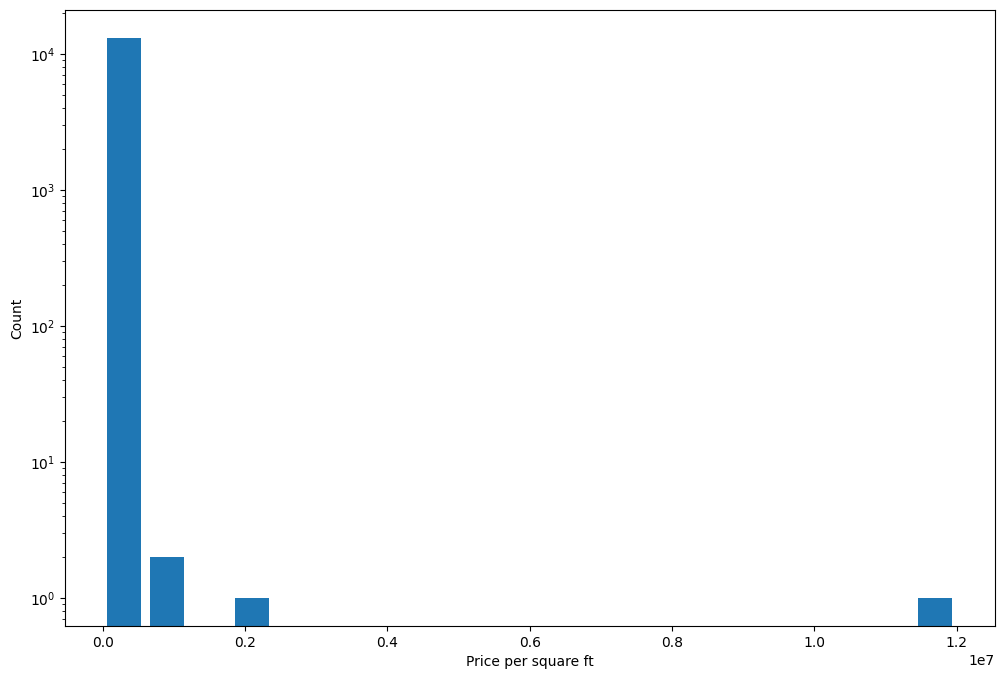

In [6]:
plt.hist(df.price_per_sqft, bins=20 , rwidth = 0.8)
plt.xlabel('Price per square ft')
plt.ylabel('Count')
plt.yscale('log')
plt.show()

Treat outliers using percentile first 


In [7]:
lower_limit, upper_limit = df.price_per_sqft.quantile([0.001,0.999])
lower_limit, upper_limit

(1366.184, 50959.36200000098)

In [8]:
outliers = df[(df.price_per_sqft>upper_limit ) | (df.price_per_sqft < lower_limit)]
outliers.sample(10)

,location,size,total_sqft,bath,price,bhk,price_per_sqft
4924,other,7 BHK,5.0,7.0,115.0,7,2300000
12355,other,4 BHK,16335.0,4.0,149.0,4,912
7799,other,4 BHK,2000.0,3.0,1063.0,4,53150
5343,other,9 BHK,42000.0,8.0,175.0,9,416
7012,other,1 BHK,650.0,1.0,500.0,1,76923
11447,Whitefield,4 Bedroom,60.0,4.0,218.0,4,363333
665,Yelahanka,3 BHK,35000.0,3.0,130.0,3,371
798,other,4 Bedroom,10961.0,4.0,80.0,4,729
6356,Bommenahalli,4 Bedroom,2940.0,3.0,2250.0,4,76530
1106,other,5 Bedroom,24.0,2.0,150.0,5,625000


In [9]:
df2 = df[(df.price_per_sqft<upper_limit ) & (df.price_per_sqft > lower_limit)]
df2.shape

(13172, 7)

In [10]:
df.shape

(13200, 7)

In [11]:
df.shape[0] - df2.shape[0]

28

# Now remove outliers using 4 Standerd Deviation 

In [12]:
max_limit = df2.price_per_sqft.mean() + 4*df2.price_per_sqft.std()
min_limit = df2.price_per_sqft.mean() - 4*df2.price_per_sqft.std()
max_limit,min_limit


(23227.73653589432, -9900.429065502582)

In [13]:
df2[(df2.price_per_sqft>max_limit) | (df2.price_per_sqft<min_limit)].sample(10)

,location,size,total_sqft,bath,price,bhk,price_per_sqft
9873,other,3 Bedroom,2400.0,6.0,775.0,3,32291
9099,Whitefield,3 BHK,1496.0,2.0,718.0,3,47994
9907,other,8 Bedroom,600.0,4.0,175.0,8,29166
1770,other,10 Bedroom,1660.0,10.0,475.0,10,28614
12900,HAL 2nd Stage,5 Bedroom,2040.0,4.0,500.0,5,24509
12352,other,6 Bedroom,2400.0,5.0,750.0,6,31250
2371,other,5 Bedroom,3000.0,6.0,1000.0,5,33333
12799,other,5 Bedroom,1650.0,5.0,450.0,5,27272
1795,2nd Stage Nagarbhavi,5 Bedroom,1200.0,4.0,285.0,5,23750
4119,other,4 Bedroom,7000.0,5.0,2050.0,4,29285


In [14]:
df3 = df2[(df2.price_per_sqft<max_limit) & (df2.price_per_sqft>min_limit)]
df3.shape

(13047, 7)

In [15]:
df2.shape[0] - df3.shape[0]


125

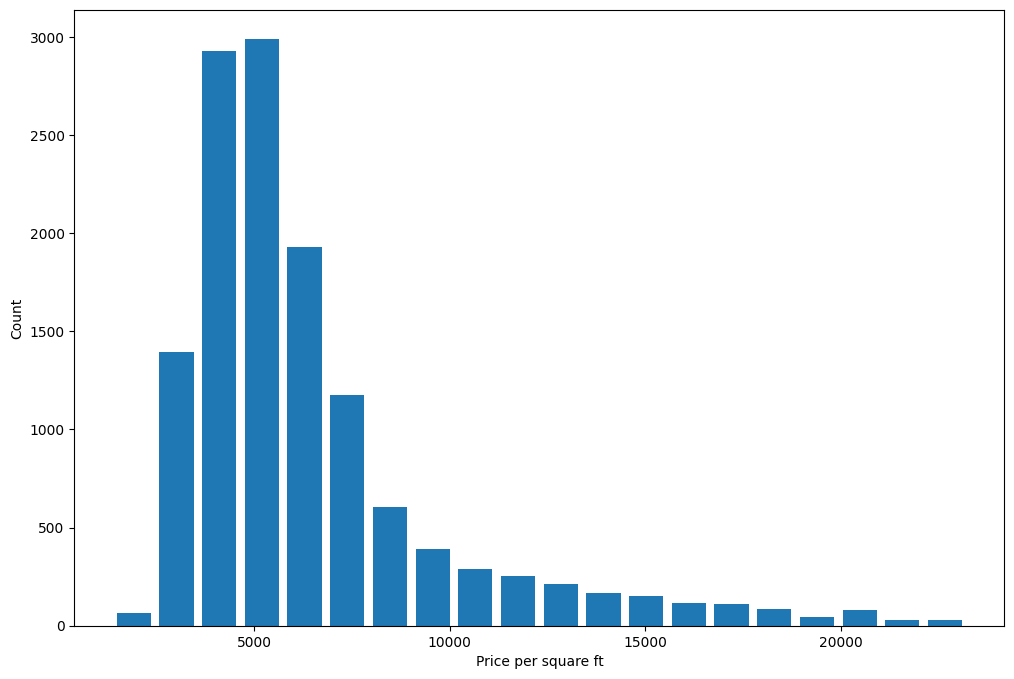

In [16]:
plt.hist(df3.price_per_sqft , bins = 20, rwidth = 0.8)
plt.xlabel('Price per square ft')
plt.ylabel("Count")
plt.show()

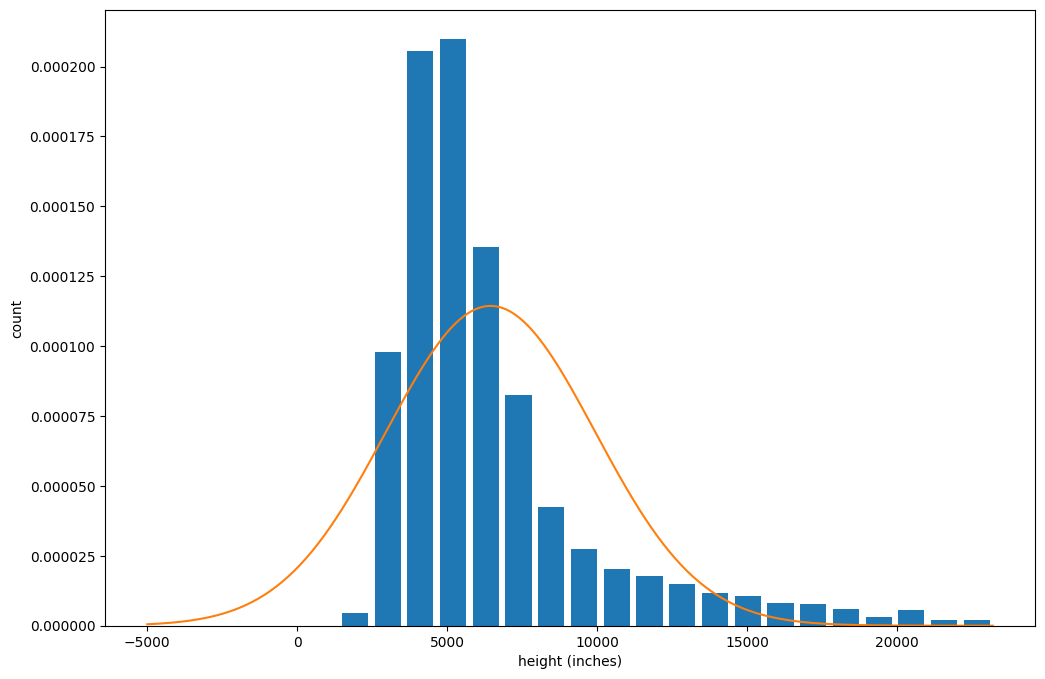

In [18]:
from scipy.stats import norm
import numpy as np

plt.hist(df3.price_per_sqft , bins=20 ,rwidth = 0.8 , density = True)
plt.xlabel("height (inches)")
plt.ylabel("count")

rng = np.arange(-5000, df3.price_per_sqft.max(), 100)
plt.plot(rng, norm.pdf(rng,df3.price_per_sqft.mean(),df3.price_per_sqft.std()))

In [20]:
df2['zscore'] = (df2.price_per_sqft-df2.price_per_sqft.mean())/df2.price_per_sqft.std()
df2.sample(10)

C:\Users\Hp\AppData\Local\Temp\ipykernel_4292\722868599.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['zscore'] = (df2.price_per_sqft-df2.price_per_sqft.mean())/df2.price_per_sqft.std()


,location,size,total_sqft,bath,price,bhk,price_per_sqft,zscore
8531,Kanakpura Road,3 BHK,1550.0,3.0,64.70,3,4174,-0.601217
9133,Bisuvanahalli,3 BHK,1075.0,2.0,45.00,3,4186,-0.598320
9849,Whitefield,2 BHK,1015.0,2.0,45.00,2,4433,-0.538672
4931,Hosa Road,2 BHK,1016.0,2.0,40.00,2,3937,-0.658450
12529,TC Palaya,3 Bedroom,1200.0,2.0,66.00,3,5500,-0.281007
10966,Yelahanka New Town,2 BHK,860.0,1.0,31.00,2,3604,-0.738865
1846,Kasavanhalli,5 Bedroom,5800.0,7.0,1200.00,5,20689,3.386930
368,Bannerghatta Road,2 BHK,1050.0,2.0,65.00,2,6190,-0.114381
7233,Kadugodi,3 BHK,1351.0,2.0,78.00,3,5773,-0.215081
2153,Thanisandra,2 BHK,1183.0,2.0,58.56,2,4950,-0.413824


In [22]:
outlier_z = df2[(df2.zscore < -4) | (df2.zscore > 4)]
outlier_z.shape

(125, 8)

In [23]:
outlier_z.sample(5)

,location,size,total_sqft,bath,price,bhk,price_per_sqft,zscore
2371,other,5 Bedroom,3000.0,6.0,1000.0,5,33333,6.440283
8082,Nagarbhavi,4 Bedroom,1200.0,3.0,340.0,4,28333,5.232851
9419,HSR Layout,9 Bedroom,1200.0,9.0,350.0,9,29166,5.434010
3873,other,5 Bedroom,1250.0,5.0,300.0,5,24000,4.186491
6597,other,2 BHK,1030.0,2.0,300.0,2,29126,5.424350


In [24]:
df4 = df2[(df2.zscore > -4) & (df2.zscore < 4)]
df4.shape

(13047, 8)

In [25]:
df2.shape[0] - df4.shape[0]


125